# Formative Assignment: Advanced Linear Algebra (PCA)
This notebook will guide you through the implementation of Principal Component Analysis (PCA). Fill in the missing code and provide the required answers in the appropriate sections. You will work with a dataset that is Africanized .

Make sure to display outputs for each code cell when submitting.

### Step 1: Load and Standardize the Data
Before applying PCA, we must standardize the dataset. Standardization ensures that all features have a mean of 0 and a standard deviation of 1, which is essential for PCA.
Fill in the code to standardize the dataset.

STRICTLY - Write code that implements standardization based on the image below

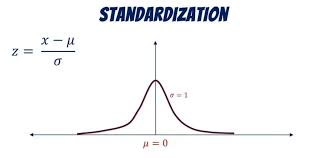


In [4]:
# Step 1: Load and Standardize the data (use of numpy only allowed)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('Global_Development_Indicators_2000_2020.csv')
df.head(10)

,year,country_code,country_name,region,income_group,currency_unit,gdp_usd,population,gdp_per_capita,inflation_rate,...,education_health_ratio,years_since_2000,years_since_century,is_pandemic_period,human_development_index,climate_vulnerability_index,digital_readiness_score,governance_quality_index,global_resilience_score,global_development_resilience_index
0,2000,AFE,Africa Eastern and Southern,NaN,NaN,NaN,2.839525e+11,398113044.0,713.245921,8.601485,...,NaN,0,0,0,0.075174,0.252217,0.012104,0.5,0.134733,12.302733
1,2001,AFE,Africa Eastern and Southern,NaN,NaN,NaN,2.588432e+11,408522129.0,633.608789,5.840354,...,NaN,1,1,0,0.094327,0.238820,0.016189,0.5,0.067481,13.257762
2,2002,AFE,Africa Eastern and Southern,NaN,NaN,NaN,2.648950e+11,419223717.0,631.870340,8.763752,...,NaN,2,2,0,0.114721,0.241795,0.020744,0.5,0.066218,13.962528
3,2003,AFE,Africa Eastern and Southern,NaN,NaN,NaN,3.526921e+11,430246635.0,819.743981,7.449700,...,NaN,3,3,0,0.135402,0.243486,0.027147,0.5,0.146931,15.163578
4,2004,AFE,Africa Eastern and Southern,NaN,NaN,NaN,4.388756e+11,441630149.0,993.762711,5.023421,...,NaN,4,4,0,0.155819,0.247210,0.035082,0.5,0.191834,16.111022
5,2005,AFE,Africa Eastern and Southern,NaN,NaN,NaN,5.122599e+11,453404076.0,1129.808710,8.558038,...,NaN,5,5,0,0.176039,0.249496,0.050789,0.5,0.231804,16.950349
6,2006,AFE,Africa Eastern and Southern,NaN,NaN,NaN,5.759762e+11,465581372.0,1237.111802,8.898164,...,NaN,6,6,0,0.195539,0.250740,0.066684,0.5,0.256449,17.857176
7,2007,AFE,Africa Eastern and Southern,NaN,NaN,NaN,6.612422e+11,478166911.0,1382.869039,8.450775,...,NaN,7,7,0,0.215449,0.253194,0.086547,0.5,0.278305,18.803814
8,2008,AFE,Africa Eastern and Southern,NaN,NaN,NaN,7.083543e+11,491173160.0,1442.168158,12.566645,...,NaN,8,8,0,0.235188,0.252490,0.106531,0.5,0.281155,19.684817
9,2009,AFE,Africa Eastern and Southern,NaN,NaN,NaN,7.125580e+11,504604672.0,1412.111284,8.954218,...,NaN,9,9,0,0.254744,0.254602,0.124114,0.5,0.291452,20.750805


In [5]:
df.isnull().sum()


,0
year,0
country_code,0
country_name,0
region,1008
income_group,1029
currency_unit,1008
gdp_usd,224
population,0
gdp_per_capita,224
inflation_rate,810


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5556 entries, 0 to 5555
Data columns (total 47 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   year                                 5556 non-null   int64  
 1   country_code                         5556 non-null   object 
 2   country_name                         5556 non-null   object 
 3   region                               4548 non-null   object 
 4   income_group                         4527 non-null   object 
 5   currency_unit                        4548 non-null   object 
 6   gdp_usd                              5332 non-null   float64
 7   population                           5556 non-null   float64
 8   gdp_per_capita                       5332 non-null   float64
 9   inflation_rate                       4746 non-null   float64
 10  unemployment_rate                    4926 non-null   float64
 11  fdi_pct_gdp                   

In [7]:
#selecting column[region,country_name] contain word africa in them
africa_data = df[df['region'].str.contains('africa', case=False, na=False) | df['country_name'].str.contains('africa', case=False, na=False)]
display(africa_data)

,year,country_code,country_name,region,income_group,currency_unit,gdp_usd,population,gdp_per_capita,inflation_rate,...,education_health_ratio,years_since_2000,years_since_century,is_pandemic_period,human_development_index,climate_vulnerability_index,digital_readiness_score,governance_quality_index,global_resilience_score,global_development_resilience_index
0,2000,AFE,Africa Eastern and Southern,NaN,NaN,NaN,2.839525e+11,398113044.0,713.245921,8.601485,...,NaN,0,0,0,0.075174,0.252217,0.012104,0.5,0.134733,12.302733
1,2001,AFE,Africa Eastern and Southern,NaN,NaN,NaN,2.588432e+11,408522129.0,633.608789,5.840354,...,NaN,1,1,0,0.094327,0.238820,0.016189,0.5,0.067481,13.257762
2,2002,AFE,Africa Eastern and Southern,NaN,NaN,NaN,2.648950e+11,419223717.0,631.870340,8.763752,...,NaN,2,2,0,0.114721,0.241795,0.020744,0.5,0.066218,13.962528
3,2003,AFE,Africa Eastern and Southern,NaN,NaN,NaN,3.526921e+11,430246635.0,819.743981,7.449700,...,NaN,3,3,0,0.135402,0.243486,0.027147,0.5,0.146931,15.163578
4,2004,AFE,Africa Eastern and Southern,NaN,NaN,NaN,4.388756e+11,441630149.0,993.762711,5.023421,...,NaN,4,4,0,0.155819,0.247210,0.035082,0.5,0.191834,16.111022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5551,2016,ZWE,Zimbabwe,Sub-Saharan Africa,Lower middle income,Zimbabwean Dollar,2.054868e+10,14030338.0,1464.588957,-1.543670,...,NaN,16,16,0,0.370373,0.179093,0.421578,0.5,0.375164,30.424141
5552,2017,ZWE,Zimbabwe,Sub-Saharan Africa,Lower middle income,Zimbabwean Dollar,1.758489e+10,14236599.0,1235.189032,0.893962,...,NaN,17,17,0,0.377994,0.177640,0.451950,0.5,0.365426,30.831303
5553,2018,ZWE,Zimbabwe,Sub-Saharan Africa,Lower middle income,Zimbabwean Dollar,1.811554e+10,14438812.0,1254.642265,10.618866,...,NaN,18,18,0,0.386741,0.183261,0.423016,0.5,0.343432,31.485225
5554,2019,ZWE,Zimbabwe,Sub-Saharan Africa,Lower middle income,Zimbabwean Dollar,1.928429e+10,14645473.0,1316.740657,255.304991,...,NaN,19,19,0,0.389866,0.386967,0.425841,0.5,0.513916,23.194054


In [8]:
# selecting necessary  columns with  numerical values
numeric_columns = ["year",
    "gdp_usd",
    "gdp_per_capita",
    "inflation_rate",
    "unemployment_rate",
    "fdi_pct_gdp",
    "population",
    "life_expectancy"
]

africa_numeric = africa_data[numeric_columns]
display(africa_numeric.head())

,year,gdp_usd,gdp_per_capita,inflation_rate,unemployment_rate,fdi_pct_gdp,population,life_expectancy
0,2000,2.839525e+11,713.245921,8.601485,7.724844,1.558123,398113044.0,51.276129
1,2001,2.588432e+11,633.608789,5.840354,7.732945,4.837769,408522129.0,51.606458
2,2002,2.648950e+11,631.870340,8.763752,7.959582,2.503637,419223717.0,52.043149
3,2003,3.526921e+11,819.743981,7.449700,7.787965,2.488972,430246635.0,52.585853
4,2004,4.388756e+11,993.762711,5.023421,7.310328,1.866596,441630149.0,53.228913


In [9]:
# handling or removing  the missing values
africa_numeric = africa_numeric.fillna(africa_numeric.mean())
africa_numeric

,year,gdp_usd,gdp_per_capita,inflation_rate,unemployment_rate,fdi_pct_gdp,population,life_expectancy
0,2000,2.839525e+11,713.245921,8.601485,7.724844,1.558123,398113044.0,51.276129
1,2001,2.588432e+11,633.608789,5.840354,7.732945,4.837769,408522129.0,51.606458
2,2002,2.648950e+11,631.870340,8.763752,7.959582,2.503637,419223717.0,52.043149
3,2003,3.526921e+11,819.743981,7.449700,7.787965,2.488972,430246635.0,52.585853
4,2004,4.388756e+11,993.762711,5.023421,7.310328,1.866596,441630149.0,53.228913
...,...,...,...,...,...,...,...,...
5551,2016,2.054868e+10,1464.588957,-1.543670,4.788000,1.669274,14030338.0,60.294000
5552,2017,1.758489e+10,1235.189032,0.893962,4.785000,1.746885,14236599.0,60.812000
5553,2018,1.811554e+10,1254.642265,10.618866,4.796000,3.962704,14438812.0,61.195000
5554,2019,1.928429e+10,1316.740657,255.304991,4.833000,1.293799,14645473.0,61.490000


In [10]:
# converting our dataframe to our numpy array
data = data = africa_numeric.to_numpy()
data

array([[2.00000000e+03, 2.83952505e+11, 7.13245921e+02, ...,
        1.55812319e+00, 3.98113044e+08, 5.12761289e+01],
       [2.00100000e+03, 2.58843211e+11, 6.33608789e+02, ...,
        4.83776865e+00, 4.08522129e+08, 5.16064583e+01],
       [2.00200000e+03, 2.64895032e+11, 6.31870340e+02, ...,
        2.50363689e+00, 4.19223717e+08, 5.20431493e+01],
       ...,
       [2.01800000e+03, 1.81155438e+10, 1.25464226e+03, ...,
        3.96270369e+00, 1.44388120e+07, 6.11950000e+01],
       [2.01900000e+03, 1.92842897e+10, 1.31674066e+03, ...,
        1.29379927e+00, 1.46454730e+07, 6.14900000e+01],
       [2.02000000e+03, 1.80511708e+10, 1.21450982e+03, ...,
        8.32965361e-01, 1.48629270e+07, 6.24091533e+01]])

In [11]:
# standardizzing data
mean = np.mean(data, axis=0)
std = np.std(data, axis=0)
standardized_data = (data - mean)/ std # Do not use sklearn (Data - Data Mean)/ Data's Standard Deviation
standardized_data[:5]  # Display the first few rows of standardized data

array([[-1.64667933,  0.22955712, -0.45232851,  0.01213921, -0.18485753,
        -0.18465865,  1.68159345, -1.18281842],
       [-1.48145655,  0.17320722, -0.46010307, -0.09019372, -0.18369505,
        -0.01141511,  1.73598511, -1.14772286],
       [-1.31623376,  0.18678863, -0.46027278,  0.01815312, -0.1511737 ,
        -0.13471296,  1.79190522, -1.10132701],
       [-1.15101097,  0.38382145, -0.44193167, -0.0305482 , -0.17579997,
        -0.13548761,  1.84950441, -1.04366789],
       [-0.98578819,  0.57723311, -0.42494315, -0.12047087, -0.24433883,
        -0.16836392,  1.90898786, -0.97534653]])

### Step 3: Calculate the Covariance Matrix
The covariance matrix helps us understand how the features are related to each other. It is a key component in PCA.

In [12]:
# Step 3: Calculate the Covariance Matrix
cov_matrix = np.cov(standardized_data, rowvar=False)
cov_matrix

array([[ 1.00062228,  0.13498081,  0.09478414, -0.01467002, -0.01111947,
        -0.02326714,  0.06201878,  0.27022284],
       [ 0.13498081,  1.00062228,  0.04048289, -0.03957132, -0.01786549,
        -0.06107483,  0.77342782,  0.14011841],
       [ 0.09478414,  0.04048289,  1.00062228, -0.067784  , -0.15703539,
         0.063521  , -0.1167114 ,  0.5255174 ],
       [-0.01467002, -0.03957132, -0.067784  ,  1.00062228, -0.02106689,
        -0.00395632, -0.02787816, -0.09981095],
       [-0.01111947, -0.01786549, -0.15703539, -0.02106689,  1.00062228,
        -0.0167884 , -0.0882234 ,  0.00734535],
       [-0.02326714, -0.06107483,  0.063521  , -0.00395632, -0.0167884 ,
         1.00062228, -0.05734716,  0.10279777],
       [ 0.06201878,  0.77342782, -0.1167114 , -0.02787816, -0.0882234 ,
        -0.05734716,  1.00062228, -0.07427255],
       [ 0.27022284,  0.14011841,  0.5255174 , -0.09981095,  0.00734535,
         0.10279777, -0.07427255,  1.00062228]])

### Step 4: Perform Eigendecomposition
Eigendecomposition of the covariance matrix will give us the eigenvalues and eigenvectors, which are essential for PCA.
Fill in the code to compute the eigenvalues and eigenvectors of the covariance matrix.

In [13]:
# Step 4: Perform Eigendecomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

eigenvalues, eigenvectors

(array([1.83457985, 1.68613898, 0.19392768, 0.41820473, 0.84498933,
        1.05667697, 0.99893352, 0.97152715]),
 array([[ 0.25232564,  0.26228424,  0.00595201,  0.21759561,  0.70236042,
         -0.30342678,  0.45982559,  0.15276753],
        [ 0.67290799, -0.16080803, -0.69634592, -0.01424565, -0.15739749,
         -0.01635156, -0.06089144,  0.08652119],
        [ 0.14584394,  0.6032678 ,  0.05111366,  0.64861253, -0.37214688,
          0.18785149,  0.00484327, -0.13297274],
        [-0.09412939, -0.1304008 ,  0.01501108, -0.02760609, -0.31216892,
          0.34898617,  0.65767058,  0.56690078],
        [-0.10521359, -0.09029864,  0.06908445,  0.19950726, -0.37070132,
         -0.81585249, -0.07672126,  0.35676259],
        [-0.05629753,  0.18354482, -0.0252904 ,  0.07160715,  0.26191997,
          0.24491601, -0.57916955,  0.70238979],
        [ 0.61964626, -0.32533982,  0.69503172,  0.07325832, -0.03979199,
          0.08449009, -0.09992785,  0.05521859],
        [ 0.23493619,  0.

### Step 5: Sort Principal Components
Sort the eigenvectors based on their corresponding eigenvalues in descending order. The higher the eigenvalue, the more important the eigenvector.
Complete the code to sort the eigenvectors and print the sorted components.

<a url ='https://www.youtube.com/watch?v=vaF-1xUEXsA&t=17s'>How Is Explained Variance Used In PCA?'<a/>

In [14]:
# Step 5: Sort Principal Components
sorted_indices = np.argsort(eigenvalues)[::-1]  # Sort eigenvalues in descending order
sorted_eigenvectors = eigenvectors[:, sorted_indices]# Sort eigenvectors accordingly
sorted_eigenvectors

array([[ 0.25232564,  0.26228424, -0.30342678,  0.45982559,  0.15276753,
         0.70236042,  0.21759561,  0.00595201],
       [ 0.67290799, -0.16080803, -0.01635156, -0.06089144,  0.08652119,
        -0.15739749, -0.01424565, -0.69634592],
       [ 0.14584394,  0.6032678 ,  0.18785149,  0.00484327, -0.13297274,
        -0.37214688,  0.64861253,  0.05111366],
       [-0.09412939, -0.1304008 ,  0.34898617,  0.65767058,  0.56690078,
        -0.31216892, -0.02760609,  0.01501108],
       [-0.10521359, -0.09029864, -0.81585249, -0.07672126,  0.35676259,
        -0.37070132,  0.19950726,  0.06908445],
       [-0.05629753,  0.18354482,  0.24491601, -0.57916955,  0.70238979,
         0.26191997,  0.07160715, -0.0252904 ],
       [ 0.61964626, -0.32533982,  0.08449009, -0.09992785,  0.05521859,
        -0.03979199,  0.07325832,  0.69503172],
       [ 0.23493619,  0.61377749, -0.13359486,  0.03145663,  0.08023633,
        -0.19587798, -0.69331911,  0.15410267]])

### Step 6: Project Data onto Principal Components
Now that we’ve selected the number of components, we will project the original data onto the chosen principal components.
Fill in the code to perform the projection.

In [15]:
# Step 6: Project Data onto Principal Components
num_components =2 # Decide on the number of principal components to keep
reduced_data = standardized_data @ eigenvectors[:, :num_components] # Project data onto the principal components
reduced_data[:5]

array([[ 0.46581095, -2.03354825],
       [ 0.51015458, -1.93695917],
       [ 0.59983062, -1.92532236],
       [ 0.83323665, -1.87752409],
       [ 1.07798882, -1.82057982]])

### Step 7: Output the Reduced Data
Finally, display the reduced data obtained by projecting the original dataset onto the selected principal components.

In [16]:
# Step 7: Output the Reduced Data
print(f'Reduced Data Shape: {reduced_data.shape}')  # Display reduced data shape
reduced_data[:5]  # Display the first few rows of reduced data

Reduced Data Shape: (1608, 2)


array([[ 0.46581095, -2.03354825],
       [ 0.51015458, -1.93695917],
       [ 0.59983062, -1.92532236],
       [ 0.83323665, -1.87752409],
       [ 1.07798882, -1.82057982]])

### Step 8: Visualize Before and After PCA
Now, let's plot the original data and the data after PCA to compare the reduction in dimensions visually.

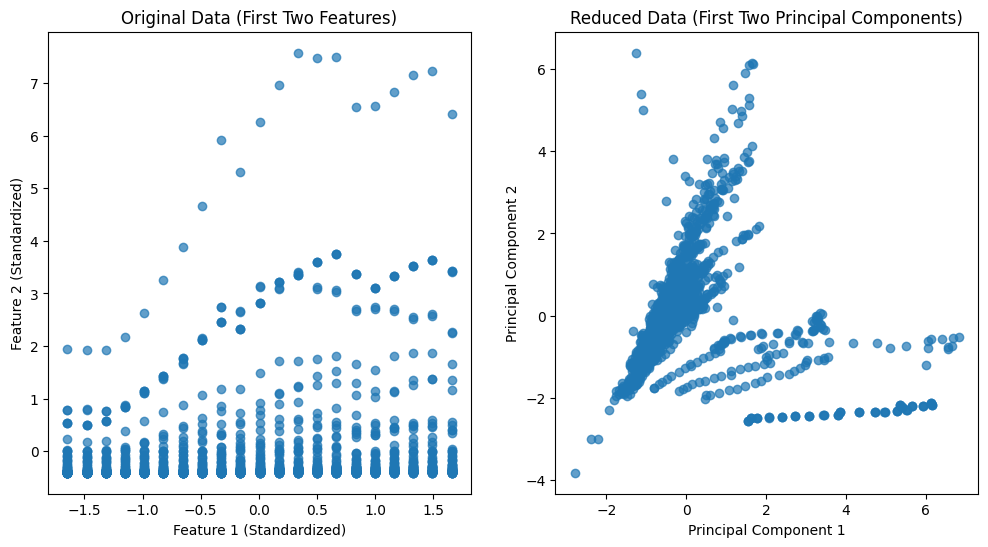

In [18]:
# Step 8: Visualize Before PCA

# Plot original data (first two features for simplicity)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(standardized_data[:, 0], standardized_data[:, 1], alpha=0.7)
plt.title('Original Data (First Two Features)')
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')


# Plot reduced data after PCA
plt.subplot(1, 2, 2)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], alpha=0.7)
plt.title('Reduced Data (First Two Principal Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.show()